<h1 style="text-align: center;"><b>Public Transportation Transaction Transjakarta Analysis</b></h1>
<h3 style="text-align: center;"><b>Elia Samuel</b></h3>

---

## **Section 1. Business Context**

**1.1 Context** <br>
Transjakarta adalah salah satu sistem transportasi publik utama di Jakarta yang melayani jutaan perjalanan setiap bulan. Dengan peningkatan jumlah pengguna, manajemen yang efisien dan pengalaman pelanggan yang optimal menjadi hal yang sangat penting. Untuk itu, diperlukan analisis mendalam terhadap data perjalanan, pola penggunaan rute, dan perilaku penumpang.

---

**1.2 Problem Statements** <br>
Manajemen Transjakarta ingin mengetahui koridor dan waktu perjalanan yang paling sering digunakan oleh penumpang, serta bagaimana distribusinya berdasarkan arah perjalanan (Go/Back) dan demografi penumpang seperti usia dan jenis kelamin. Informasi ini akan membantu Transjakarta untuk:

1. Mengalokasikan armada secara lebih efektif pada koridor dan waktu tertentu.
1. Meningkatkan pengalaman pengguna dengan menyesuaikan layanan berdasarkan kebutuhan penumpang.
1. Merencanakan pengembangan infrastruktur pada koridor yang paling sibuk.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:

**Koridor dan waktu perjalanan mana yang paling sering digunakan penumpang Transjakarta, serta bagaimana distribusinya berdasarkan arah perjalanan dan demografi pengguna?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data transaksi penumpang selam bulan April 2023 yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo). 

## **Section 2. Data Understanding**

In [1]:
# Import Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'D:\Data Science\Capstone Project\Capstone Project 2\Public-Transportation-Transaction-Transjakarta\data\raw\data_transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,106.84402,7,4/3/2023 5:21,P00253,Tegalan,-6.203101,106.85715,12.0,4/3/2023 6:00,3500.0
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,106.83302,13,4/3/2023 5:42,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,4/3/2023 6:40,3500.0
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,106.81435,38,4/3/2023 5:59,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,4/3/2023 6:50,3500.0
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,106.93526,23,4/3/2023 5:44,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,4/3/2023 6:28,3500.0
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,106.88900,5,4/3/2023 6:17,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,4/3/2023 6:57,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4.685820e+18,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1,P00261,...,106.82309,2,4/21/2023 18:18,P00228,SMK 57,-6.290967,106.82365,13.0,4/21/2023 19:55,3500.0
37896,YHHK837P6Y95GN,6.502900e+15,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1,P00064,...,106.88116,1,4/18/2023 21:52,P00179,Pinang Ranti,-6.291075,106.88634,2.0,4/18/2023 22:28,3500.0
37897,YXPP627N4G95HO,2.131590e+14,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1,B02873P,...,106.81676,12,4/4/2023 10:29,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,4/4/2023 13:27,20000.0
37898,RGVK175U2U98UV,3.778410e+14,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1,B02505P,...,106.80954,33,4/15/2023 19:59,B01787P,JPO Blok G,-6.188861,106.81135,34.0,4/15/2023 20:27,0.0
37899,FMZZ963S4B68ZP,5.018630e+11,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0,P00001,...,106.74786,2,4/12/2023 21:08,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,4/12/2023 21:34,3500.0


In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

Jumlah baris dan kolom di dataset df adalah (37900, 22)


**2.1 General Information** <br>

Dataset ini merepresentasikan rincian perjalanan Transjakarta pada bulan April 2023. Atribut utama meliputi demografi penumpang, rincian perjalanan, dan informasi pembayaran tarif. Ada 22 Kolom dalam dataset Transjakarta, yaitu:

1. `transID`: Id transaksi unik untuk setiap transaksi
2. `payCardID`: Pengenal utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
3. `payCardBank`: Nama bank penerbit kartu pelanggan
4. `payCardName`: Nama pelanggan yang tercantum di dalam kartu.
5. `payCardSex`: Jenis kelamin pelanggan yang tertanam dalam kartu
6. `payCardBirthDate`: Tahun kelahiran pelanggan
7. `corridorID`: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8. `corridorName`: Nama Koridor / Nama Rute berisi Start dan Finish untuk setiap rute.
9. `direction`: 0 untuk Pergi, 1 untuk Kembali. Arah dari rute.
10. `tapInStops`: Ketuk Masuk (pintu masuk) ID Halte untuk mengidentifikasi nama halte
11. `tapInStopsName` (Nama Halte): Ketuk Masuk (pintu masuk) Nama Halte tempat pelanggan mengetuk masuk.
12. `tapInStopsLat`: Garis Lintang dari Tap In Halte
13. `tapInStopsLon`: Bujur dari Tap In (pintu masuk) Perhentian
14. `stopStartSeq`: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
15. `tapInTime`: Waktu tap in. Tanggal dan waktu
16. `tapOutStops`: Tap Out (Keluar) ID Halte untuk mengidentifikasi nama halte
17. `tapOutStopsName`: Tap Out (Keluar) Nama Halte tempat pelanggan melakukan tap out.
18. `tapOutStopsLat`: Garis Lintang Tap Out (keluar) Pemberhentian
19. `tapOutStopsLon`: Bujur dari Tap Out Stops
20. `stopEndSeq`: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
21. `tapOutTime`: Waktu tap out. Tanggal dan waktu
22. `payAmount`: Jumlah yang harus dibayar pelanggan. Ada yang gratis. Beberapa tidak.

---

**2.2 Feature Information**

Berikut adalah penjelasan mengenai fitur-fitur yang akan digunakan dalam analisis Transjakarta:

1. **Identitas Transaksi dan Pengguna**  
   - **`transID`**: ID unik untuk setiap transaksi. Berguna untuk memastikan data tidak duplikat dan melacak setiap perjalanan secara spesifik.  
   - **`payCardID`**: ID kartu pengguna yang berfungsi sebagai pengidentifikasi utama pengguna dalam sistem.  
   - **`payCardName`**: Nama pengguna yang tertera pada kartu. Berguna untuk segmentasi lebih mendalam jika dikombinasikan dengan atribut lainnya.  
   - **`payCardSex`**: Jenis kelamin pengguna. Berguna untuk analisis demografi dan memahami perbedaan pola perjalanan berdasarkan jenis kelamin.  
   - **`payCardBirthDate`**: Tahun kelahiran pengguna, yang dapat digunakan untuk menghitung usia dan menganalisis perilaku perjalanan berdasarkan kelompok usia.  

2. **Rute dan Pemberhentian**  
   - **`corridorID`** dan **`corridorName`**: Informasi mengenai rute perjalanan. Berguna untuk analisis rute terpopuler, efisiensi operasional, dan waktu perjalanan di setiap rute.  
   - **`direction`**: Menunjukkan arah perjalanan (0 untuk keberangkatan, 1 untuk kepulangan). Penting untuk analisis pola perjalanan bolak-balik.  
   - **`tapInStops`** dan **`tapOutStops`**: ID pemberhentian tempat penumpang naik dan turun.  
   - **`tapInStopsName`** dan **`tapOutStopsName`**: Nama pemberhentian tempat pengguna naik dan turun. Informasi ini relevan untuk memahami titik-titik naik dan turun terpopuler serta potensi kebutuhan infrastruktur tambahan.  
   - **`stopStartSeq`** dan **`stopEndSeq`**: Urutan pemberhentian dari awal hingga akhir perjalanan. Berguna untuk analisis rute mana yang memiliki jumlah pemberhentian paling banyak atau sedikit.  

3. **Waktu Perjalanan**  
   - **`tapInTime`** dan **`tapOutTime`**: Waktu ketika pengguna naik dan turun. Sangat penting untuk analisis waktu perjalanan, jam sibuk, dan efisiensi operasional pada berbagai waktu.  

4. **Informasi Tarif**  
   - **`payAmount`**: Tarif yang dibayarkan pengguna untuk setiap perjalanan. Fitur ini relevan untuk menganalisis pendapatan berdasarkan rute, distribusi tarif, dan pola perjalanan gratis.  

5. **Durasi Perjalanan (Calculated Field)**  
   - Kolom baru seperti **`travelDuration`** dapat diturunkan dari perbedaan waktu antara **`tapInTime`** dan **`tapOutTime`** untuk memahami durasi rata-rata perjalanan di setiap rute.  

---

**2.3 Statistics Summary**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset Transjakarta.

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  float64
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  int64  
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [5]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800440e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507950e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699020e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997690e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,15279,2230,2248,16318
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,4/3/2023 6:23,P00016,BKN,4/28/2023 18:50
freq,1,18743,80,20157,400,391,236,243,13,306,316,15


In [6]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,1880,"[180063000000000.0, 4885330000000000.0, 499623..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1, 0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


Secara umum, informasi yang dapat dilihat dalam data Transjakarta yaitu:
* Dataset Transjakarta yang terdiri dari 37.900 transaksi ini mencakup 22 variabel. 
* Analisis awal menunjukkan adanya data kosong (NaN) pada beberapa kolom,  yaitu `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` dan `payAmount`.
* Kolom `transId` merepresentasikan id unik setiap transaksi, sehingga tidak relevan untuk di analisis.
* Kolom `tapInStopsTime` dan `tapOutStopsTime` merepresentasikan waktu tap-in dan tap-out, sehinggka perlu dikonversi ke type data `datetime` untuk memungkinkan perhitungan durasi perjalanan
* Kolom `payCardSex`: Nilai M dan F akan diganti menjadi **male** dan **female** untuk penjelasan yang lebih jelas.
* Kolom `direction`: Nilai 0 dan 1 akan diganti menjadi **go** dan **back** untuk representasi yang lebih intuitif.

---


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [7]:
df.isna().mean() * 100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [8]:
(df.isna().any(axis=1).sum()) / len(df) * 100

16.279683377308707

<Axes: >

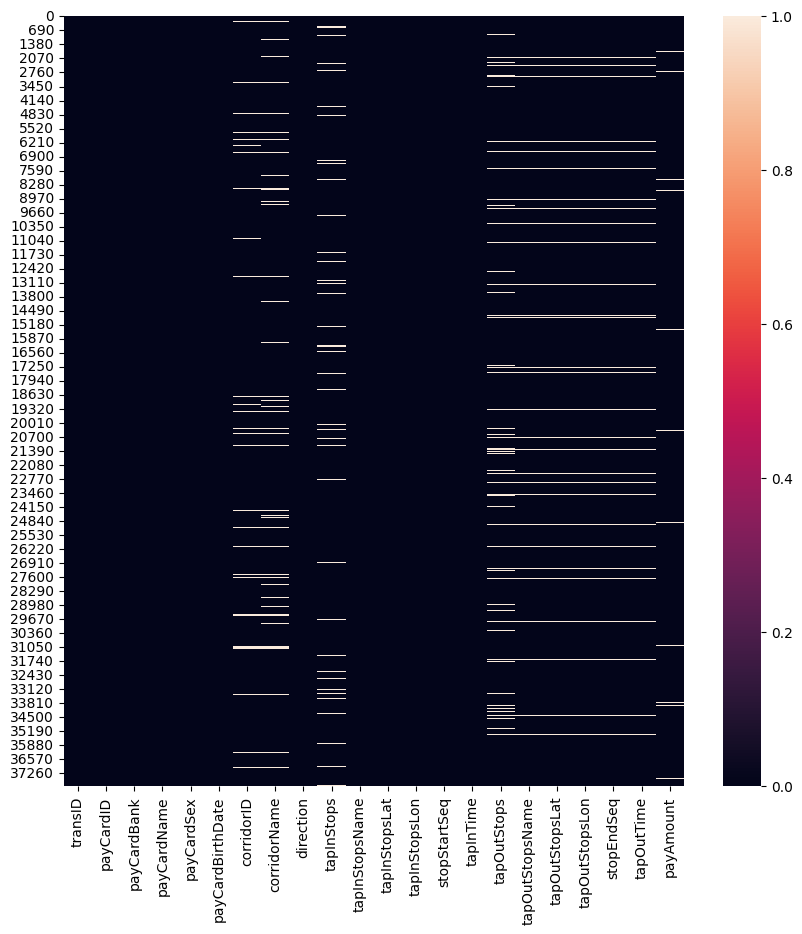

In [9]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

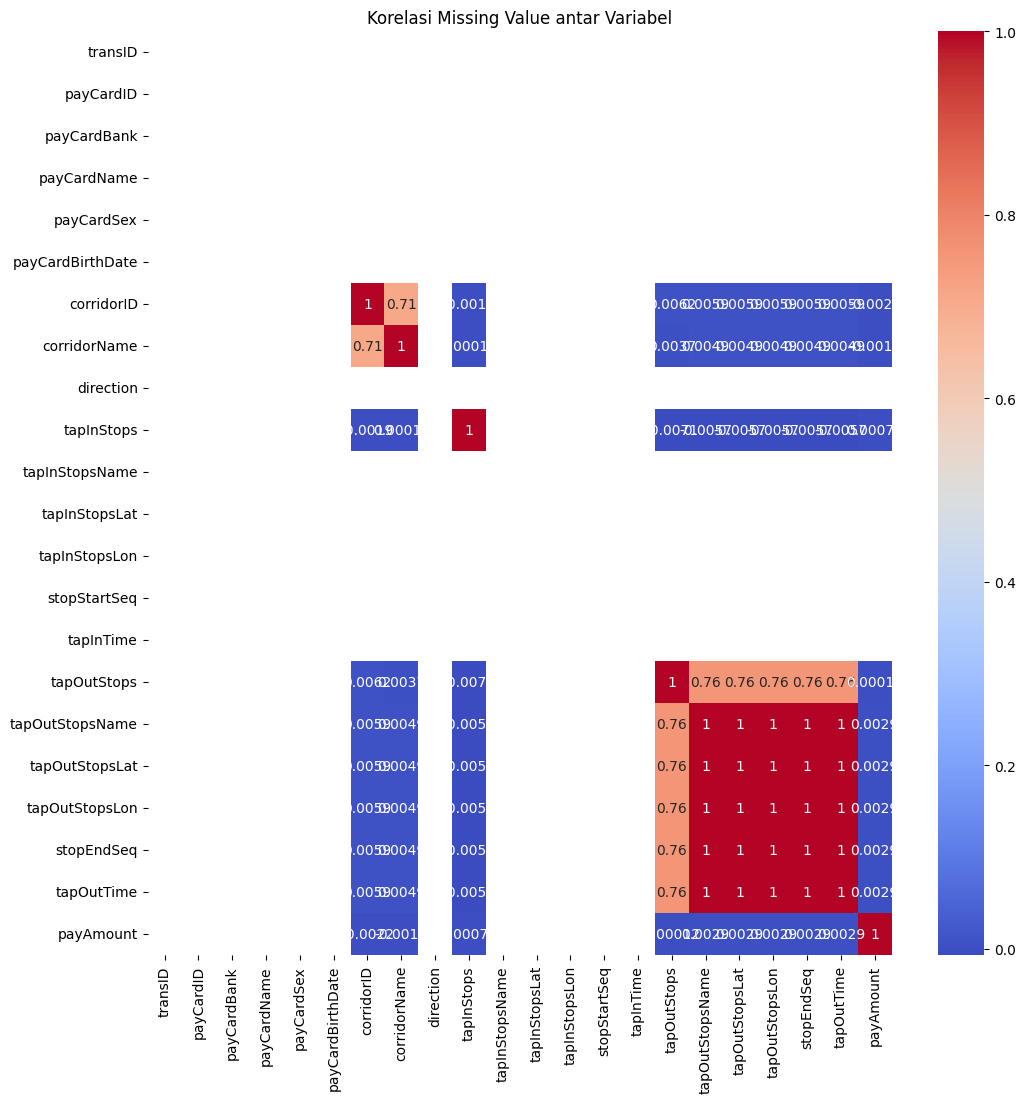

In [10]:
# Korelasi missing value dengan variabel lain
missing_corr = df.isnull().corr()
plt.figure(figsize=(12,12))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm')
plt.title("Korelasi Missing Value antar Variabel")
plt.show()

**Hasil analisis missing value berdasarkan heatmap:** <br>
* Korelasi Tinggi <br>
    - Ada korelasi kuat (sekitar 0.76 hingga 1.0) di antara kolom yang terkait dengan `tapOutStops` (`tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `tapOutTime`, dan `stopEndSeq`). Ini menunjukkan bahwa missing value pada salah satu kolom ini kemungkinan besar saling terkait.
    - Korelasi tinggi ini dapat mengindikasikan pola MAR. Misalnya, jika seseorang tidak melakukan tap-out, semua informasi yang terkait dengan lokasi atau waktu tap-out akan hilang.
* Korelasi Sedang <br>
    - Hubungan sedang terlihat antara `corridorID` dan `corridorName` (0.71). ID koridor dapat menggambarkan nama koridor. Namun, jika ada missing value pada salah satu, biasanya berkaitan dengan informasi rute yang hilang.
* Korelasi Rendah atau tidak ada <br>
    - payAmount memiliki korelasi ringan atau rendah dengan semua kolom lainnya. Ini mungkin karena payAmount tidak terkait dengan informasi lain. Nilai hilang pada payAmount dapat diindikasi pola MACR

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 16%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

#### `corridorId` dan `corridorName`

Dari analisis di atas, kita sudah tau bahwa *missing value* `corridorID` dan `corridorName` saling berkaitan. Maka, kita akan memutuskan cara pengisian kedua kolom ini secara bersamaan.  

In [11]:
df1 = df.copy()

In [12]:
corridor_df = df1[['corridorID','corridorName']]

Sebelum melakukan imputasi data, akan dilakukan validasi untuk memastikan integritas relasi satu-ke-satu antara kolom `corridorID` dan `corridorName`

In [13]:
corridor_df.dropna().groupby("corridorID")["corridorName"].nunique().loc[lambda x: x > 1]

Series([], Name: corridorName, dtype: int64)

In [14]:
corridor_df.dropna().groupby("corridorName")["corridorID"].nunique().loc[lambda x: x > 1]

corridorName
Blok M - Kota                          2
Kalideres - Bundaran HI via Veteran    2
Matraman Baru - Ancol                  2
Pinang Ranti - Pluit                   2
Pulo Gadung - Monas                    2
Name: corridorID, dtype: int64

In [15]:
corridor_df.dropna().groupby("corridorName")["corridorID"].apply(lambda x: list(x.unique())).loc[lambda x: x.apply(len) > 1]

corridorName
Blok M - Kota                          [M1, 1]
Kalideres - Bundaran HI via Veteran    [M3, 3]
Matraman Baru - Ancol                  [5, M5]
Pinang Ranti - Pluit                   [M9, 9]
Pulo Gadung - Monas                    [2, M2]
Name: corridorID, dtype: object

Berdasarkan analisis data, ditemukan beberapa kasus di mana satu nama `corridorName` dikaitkan dengan lebih dari satu `corridorID`. Hal ini tidak sesuai dengan informasi yang ada di website resmi TransjakartaOleh karena itu, perlu dilakukan koreksi terhadap nilai corridorID yang tidak sesuai.[Transjakarta](https://transjakarta.co.id/rute)

In [16]:
corridor_df['corridorID'] = corridor_df['corridorID'].replace({'M3':'3','M1':'1','M5':'5','M2':'2','M9':'9'})

In [17]:
corridor_df[['corridorID','corridorName']].isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

Kolom `corridorID` dan `corridorName` masing-masing memiliki 1257 dan 1930 nilai yang hilang. Mengingat relasi satu-ke-satu antara kedua kolom, kita akan melakukan imputasi data menggunakan teknik mapping pada kolom yang lengkap untuk mengisi nilai yang kosong.

In [18]:
# Create a dictionary mapping corridorID to corridorName for forward and backward lookup
mapping = corridor_df.dropna().drop_duplicates().set_index('corridorID')['corridorName'].to_dict()
reverse_mapping = corridor_df.dropna().drop_duplicates().set_index('corridorName')['corridorID'].to_dict()

# Fill missing values in 'corridorID' using the reverse mapping and 'corridorName' using the mapping
corridor_df['corridorID'] = corridor_df['corridorID'].fillna(corridor_df['corridorName'].map(reverse_mapping))
corridor_df['corridorName'] = corridor_df['corridorName'].fillna(corridor_df['corridorID'].map(mapping))

In [19]:
df1[['corridorID','corridorName']] = corridor_df

In [20]:
(df1.isna().any(axis=1).sum()) / len(df1) * 100

14.102902374670185

Setelah kita mengisi data yang kosong pada kolom `corridorID` dan `corridorName`, jumlah data yang hilang di seluruh dataset Transjakarta berkurang dari 16% menjadi 14%. Meskipun sudah ada perbaikan, namun persentase data yang masih kosong sebesar 14% masih cukup besar. Untuk itu, kita perlu melanjutkan proses pengisian data pada kolom-kolom lainnya.

Kolom `tapInStops`, `tapInStopsName`, `tapOutStops`, dan `tapOutStopsName` juga memiliki permasalahan missing value seperti pada kolom `corridorID` dan `corridorName`. Untuk mengatasi hal ini, akan dilakukan mapping pada nilai yang lengkap pada pasangan kolom (`tapInStops`, `tapInStopsName`) dan (`tapOutStops`, `tapOutStopsName`) untuk melakukan imputasi data yang hilang pada masing-masing pasangan kolom tersebut.

In [21]:
# Membuat peta ID ke Nama
id_to_name = pd.concat([
    df1[["tapInStops", "tapInStopsName"]].rename(columns={"tapInStops": "ID", "tapInStopsName": "Name"}),
    df1[["tapOutStops", "tapOutStopsName"]].rename(columns={"tapOutStops": "ID", "tapOutStopsName": "Name"})
]).dropna().drop_duplicates()

name_to_id = id_to_name.set_index("ID")["Name"].to_dict()

# Mengisi nilai yang hilang berdasarkan peta
df1["tapInStopsName"] = df1["tapInStopsName"].fillna(df1["tapInStops"].map(name_to_id))
df1["tapOutStopsName"] = df1["tapOutStopsName"].fillna(df1["tapOutStops"].map(name_to_id))

# Membuat peta Nama ke ID untuk mengisi ID yang hilang
name_to_id = id_to_name.set_index("Name")["ID"].to_dict()

df1["tapInStops"] = df1["tapInStops"].fillna(df1["tapInStopsName"].map(name_to_id))
df1["tapOutStops"] = df1["tapOutStops"].fillna(df1["tapOutStopsName"].map(name_to_id))

In [22]:
(df1.isna().any(axis=1).sum()) / len(df1) * 100

8.95514511873351

In [23]:
df1.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            22
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1353
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Dengan mengisi data yang kosong pada kolom `tapInStops`, `tapInStopsName`, `tapOutStops`, dan `tapOutStopsName`, kita berhasil mengurangi jumlah data yang hilang dari 14% menjadi 8%. Sayangnya, data yang hilang pada kolom `tapOutStopsName` tidak bisa diperbaiki dengan cara yang sama. Jika dilihat dari hasil heatMap missingno, data-data yang hilang pada kolom `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`,`tapOutStopsLon`, `stopEndSeq`, dan`tapOutTime` saling berkaitan. Ini terjadi karena banyak penumpang lupa atau tidak sempat men-tap kartu saat turun dari bus, sehingga data perjalanan mereka menjadi tidak lengkap.

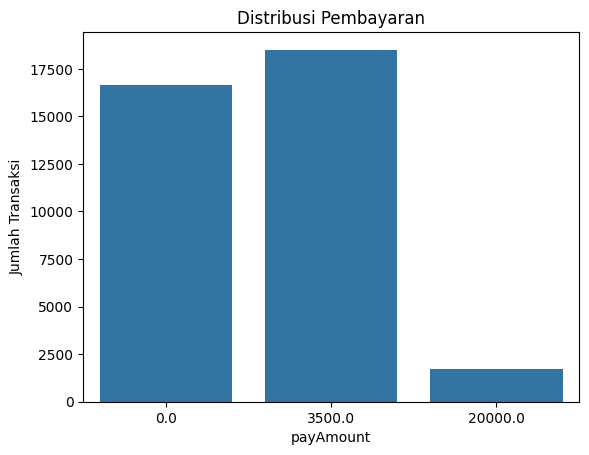

In [24]:
# Assuming 'bank_distribution' is your Series containing bank counts
sns.countplot(x='payAmount', data=df1)
plt.title('Distribusi Pembayaran')
plt.xlabel('payAmount')
plt.ylabel('Jumlah Transaksi')

plt.show()

In [25]:
df1['payAmount'].describe()

count    36893.000000
mean      2699.712683
std       4212.225592
min          0.000000
25%          0.000000
50%       3500.000000
75%       3500.000000
max      20000.000000
Name: payAmount, dtype: float64

In [26]:
missing_data = df1[df1['payAmount'].isna()]

for col in missing_data.columns:
    if col != 'payAmount':
        missing_distribution = missing_data[col].value_counts()
        print(f"Distribution of missing payAmount based on {col}:")
        print(missing_distribution)

Distribution of missing payAmount based on transID:
transID
IIEK980X1O23NZ    1
UTMV140J0S31SR    1
UPGC017A3T01GL    1
JHJM909F5F80ZV    1
XPIT744V7X14LT    1
                 ..
ERTJ183Y0S02NG    1
ISPR955R0J79WM    1
PVAM246S2C41MO    1
HFHC735I7R48LV    1
YMCL988A7J02QF    1
Name: count, Length: 1007, dtype: int64
Distribution of missing payAmount based on payCardID:
payCardID
1.800750e+14    41
3.472040e+14    40
4.214470e+18    40
5.672860e+11    40
3.729210e+14    40
                ..
4.760880e+15     1
4.349880e+12     1
4.219620e+18     1
2.283820e+15     1
3.520040e+15     1
Name: count, Length: 95, dtype: int64
Distribution of missing payAmount based on payCardBank:
payCardBank
dki       385
brizzi    153
emoney    142
online    141
flazz     140
bni        46
Name: count, dtype: int64
Distribution of missing payAmount based on payCardName:
payCardName
R.M. Labuh Laksmiwati              40
Drs. Puspa Nashiruddin             40
Dt. Atmaja Suartini, M.Farm        40
Yuni Yuli

Dari hasil analisis, kita tidak melihat adanya pola tertentu pada data yang hilang di kolom `payAmount`. Ini artinya, data yang hilang ini terjadi secara acak dan tidak dipengaruhi oleh faktor lain. Karena itu, kita akan menghapus data yang hilang pada kolom `payAmount` ini

In [27]:
df1.dropna(subset=['payAmount'],inplace=True)

In [28]:
(df1.isna().mean()) * 100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          2.973464
corridorName        2.973464
direction           0.000000
tapInStops          0.059632
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         3.561651
tapOutStopsName     3.537256
tapOutStopsLat      3.537256
tapOutStopsLon      3.537256
stopEndSeq          3.537256
tapOutTime          3.537256
payAmount           0.000000
dtype: float64

In [29]:
(df1.isna().any(axis=1).mean()) * 100

6.470062071395658

Setelah dilakukan pembersihan data, persentase baris dengan nilai hilang pada dataset Transjakarta berhasil diturunkan secara signifikan dari 16% menjadi 6%. Mengingat proporsi nilai hilang yang telah mencapai tingkat yang relatif rendah(<10%), maka dapat diputuskan untuk menghapus (drop) baris-baris dengan nilai hilang tersebut.

In [30]:
df1.dropna(inplace=True)

In [31]:
(df1.isna().any(axis=1).mean()) * 100

0.0

**3.2 Duplicated Values**

Setelah tahap imputasi missing value selesai, kita akan mengecek apakah terdapat data duplikat dalam dataset transjakarta

In [32]:
df1.duplicated().sum()

0

Dari hasil pengecekan data duplikat, tidak terdapat data duplikat dalam dataset transjakarta.

**3.3 Identify Spelling Errors**

Ada beberapa nilai yang akan diganti seperti nilai pada kolom payCardSex dan direction untuk mempermudah pembacaan informasi

In [33]:
df1['payCardSex'].replace({'M':'Male','F':'Female'},inplace=True)

In [34]:
df1['direction'].replace({0:'Go',1:'Back'},inplace=True)

In [35]:
df1.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,Back,P00142,...,106.84402,7,4/3/2023 5:21,P00253,Tegalan,-6.203101,106.85715,12.0,4/3/2023 6:00,3500.0
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,...,106.83302,13,4/3/2023 5:42,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,4/3/2023 6:40,3500.0
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,Go,B00499P,...,106.81435,38,4/3/2023 5:59,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,4/3/2023 6:50,3500.0
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,...,106.93526,23,4/3/2023 5:44,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,4/3/2023 6:28,3500.0
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,Go,P00239,...,106.88900,5,4/3/2023 6:17,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,4/3/2023 6:57,3500.0


**3.4 Identify Anomaly Values**

In [36]:
df1.describe()

,payCardID,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.450600e+04,34506.000000,34506.000000,34506.000000,34506.000000,34506.000000,34506.000000,34506.000000,34506.000000
mean,4.166017e+17,1990.180085,-6.214819,106.841809,13.630383,-6.214630,106.841498,21.323741,2709.514287
std,1.310864e+18,13.059210,0.058445,0.061073,12.298799,0.059594,0.061724,13.898494,4228.943222
min,6.040368e+10,1946.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800480e+14,1982.000000,-6.245990,106.801940,4.000000,-6.248460,106.800810,11.000000,0.000000
50%,3.507250e+15,1991.000000,-6.214145,106.835350,10.000000,-6.214459,106.834890,18.000000,3500.000000
75%,4.684650e+15,2001.000000,-6.174903,106.883630,19.000000,-6.174341,106.884910,30.000000,3500.000000
max,4.997690e+18,2012.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [37]:
df1[df1['stopEndSeq'] < df1['stopStartSeq']]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


dari Analisis diatas, tidak terdapat anomaly values dalam dataset Transjakarta

In [38]:
listItem = []
for col in df1.columns :
    listItem.append([col, df1[col].dtype, df1[col].isna().sum(),
                    df1[col].nunique(), list(df1[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df1.shape)
dfDesc

(34506, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,34506,"[RJQD762P4P26DD, PHBY363J9K21NJ]"
1,payCardID,float64,0,1829,"[213112000000000.0, 4767220000000000.0]"
2,payCardBank,object,0,6,"[bni, brizzi]"
3,payCardName,object,0,1935,"[Raisa Wibisono, Ivan Riyanti]"
4,payCardSex,object,0,2,"[Male, Female]"
5,payCardBirthDate,int64,0,66,"[2008, 1982]"
6,corridorID,object,0,211,"[M8, 1F]"
7,corridorName,object,0,211,"[Ragunan - MH Thamrin, Cililitan - Condet]"
8,direction,object,0,2,"[Back, Go]"
9,tapInStops,object,0,2483,"[B03266P, B05470P]"


Sebelum dibersihkan, kita memiliki 37,900 baris data, sekarang kita memiliki 34,506 baris. Sekitar 3,394 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

In [39]:
df1.to_csv('data-cleaned.csv',index=False)

## **Section 4. Analytics**

Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Koridor dan waktu perjalanan mana yang paling sering digunakan penumpang Transjakarta, serta bagaimana distribusinya berdasarkan arah perjalanan dan demografi pengguna?**

Analisis yang akan dilakukan meliputi:

1. Identifikasi koridor dengan frekuensi penggunaan tertinggi.
1. Analisis pola waktu perjalanan penumpang.
1. Profiling demografi pengguna Transjakarta.
1. Analisis hubungan antara data tap-in dan tap-out untuk memahami pola perjalanan.


### **4.1 Identifikasi koridor dengan frekuensi penggunaan tertinggi.**

Pertanyaan yang akan dijawab pada analisis ini yaitu:
1. Koridor mana yang memiliki frekuensi perjalanan penumpang tertinggi?
1. Apakah terdapat perbedaan signifikan dalam frekuensi penggunaan koridor berdasarkan arah perjalanan (Go atau Back)?

In [40]:
# 10 kota dengan jumlah kandidat paling banyak, dibagi berdasarkan target 
corridor_direction=pd.crosstab(df1['corridorName'],df1['direction'])
corridor_direction['Total']=corridor_direction.sum(axis=1)
corridor_direction.sort_values('Total',ascending=False).head(10)

direction,Back,Go,Total
corridorName,,,
Cibubur - Balai Kota,194,190,384
Ciputat - CSW,189,187,376
Pulo Gadung - Monas,166,167,333
Harmoni - Jakarta International Stadium,170,163,333
Kampung Rambutan - Pondok Gede,164,163,327
Kalideres - Bundaran HI via Veteran,164,159,323
Rusun Pondok Bambu - Walikota Jakarta Timur,161,162,323
Kebayoran Lama - Tanah Abang,162,159,321
Rusun Rawa Bebek - Kodamar,151,156,307


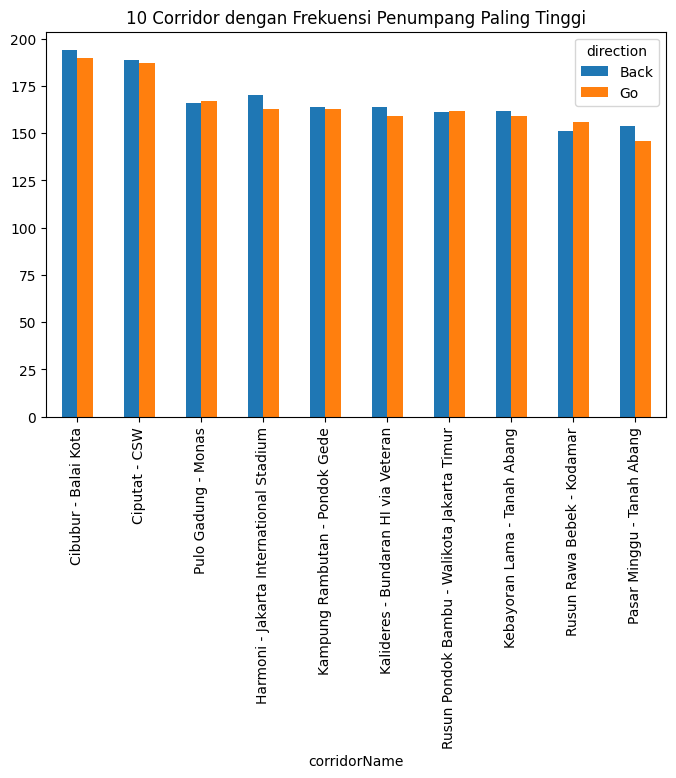

In [41]:
corridor_direction.sort_values('Total',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='10 Corridor dengan Frekuensi Penumpang Paling Tinggi')
plt.show()

In [42]:
from scipy.stats import chi2_contingency

# Buat tabel kontingensi
contingency_table = pd.crosstab(df1['corridorID'], df1['direction'])

# Lakukan uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Tampilkan hasil
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Kesimpulan berdasarkan P-value
alpha = 0.05  # Tingkat signifikansi
if p < alpha:
    print("Kesimpulan: Tolak H0. Distribusi corridorID berbeda pada Go dan Back.")
else:
    print("Kesimpulan: Gagal menolak H0. Distribusi corridorID identik pada Go dan Back.")

Chi-Square Statistic: 43.374399205574065
Degrees of Freedom: 210
P-value: 1.0
Kesimpulan: Gagal menolak H0. Distribusi corridorID identik pada Go dan Back.


Berdasarkan hasil analisis silang, visualisasi grafik, dan uji chi-square, dapat disimpulkan bahwa koridor Cibubur-Balai Kota merupakan rute yang paling sering digunakan penumpang Transjakarta dengan total frekuensi perjalanan sebanyak 384 kali. Rute ini diikuti oleh koridor Ciputat-CSW dengan total frekuensi 376 kali.

Analisis lebih lanjut menunjukkan bahwa tidak terdapat perbedaan signifikan antara jumlah penumpang yang menggunakan arah perjalanan pergi (go) dan pulang (back) pada setiap koridor. Hasil uji chi-square mengkonfirmasi bahwa distribusi frekuensi penumpang untuk kedua arah perjalanan tersebut relatif sama.

### **4.2 Analisis Pola waktu perjalanan penumpang**

Pertanyaan yang akan dijawab pada analisis ini yaitu:
1. Kapan waktu sibuk terjadi?
1. Apakah pola waktu sibuk berbeda pada hari kerja dan akhir pekan?

Sebelum melakukan analisis lebih lanjut, kita perlu membuat kolom baru yang berisikan informasi waktu dalam format jam, hari dan mengkategorikan hari dalam weekend atau weekday

In [43]:
# Konversi waktu menjadi format datetime
df1['tapInTime'] = pd.to_datetime(df1['tapInTime'])
df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'])

# Ekstraksi informasi waktu
df1['tapInHour'] = df1['tapInTime'].dt.hour
df1['tapOutHour'] = df1['tapOutTime'].dt.hour
df1['day_of_week'] = df1['tapInTime'].dt.day_name()
df1['is_weekend'] = df1['day_of_week'].isin(['Saturday', 'Sunday'])

# Distribusi waktu sibuk (jam)
peak_hours = df1.groupby(['tapInHour', 'is_weekend']).size().reset_index(name='count')

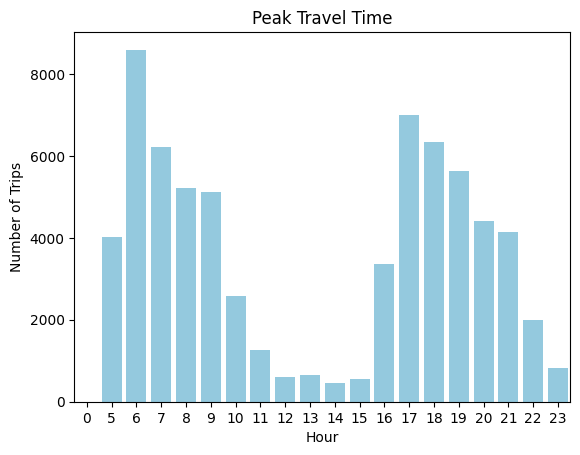

In [44]:
tapInHour_count = df1.groupby('tapInHour')['transID'].count()
tapOutHour_count = df1.groupby('tapOutHour')['transID'].count()

tapHour_total = tapInHour_count.add(tapOutHour_count, fill_value=0)

# Create a bar plot

sns.barplot(x=tapHour_total.index, y=tapHour_total.values, color='skyblue')
# Set plot title and labels
plt.title('Peak Travel Time')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
# Display the plot
plt.show()

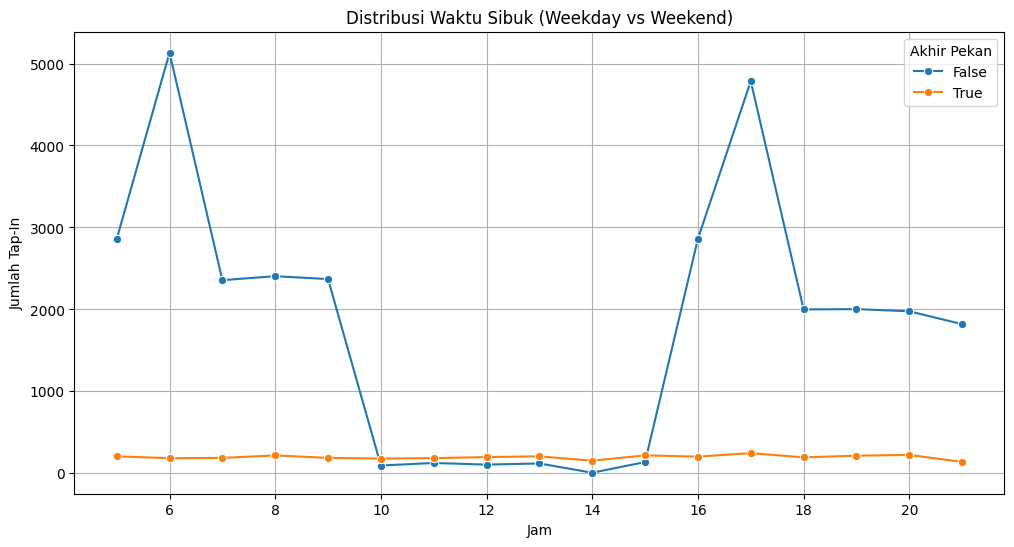

Durasi Perjalanan (menit):
count    34506.000000
mean        72.142062
std         28.056278
min         15.000000
25%         51.000000
50%         72.000000
75%         96.000000
max        179.000000
Name: trip_duration, dtype: float64


In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=peak_hours, x='tapInHour', y='count', hue='is_weekend', marker='o')
plt.title("Distribusi Waktu Sibuk (Weekday vs Weekend)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Tap-In")
plt.legend(title="Akhir Pekan")
plt.grid(True)
plt.show()

# Analisis durasi perjalanan
df1['trip_duration'] = (df1['tapOutTime'] - df1['tapInTime']).dt.total_seconds() / 60  # Dalam menit
duration_stats = df1['trip_duration'].describe()
print("Durasi Perjalanan (menit):")
print(duration_stats)

Berdasarkan hasil visualisasi grafik, dapat disimpulkan bahwa puncak aktivitas perjalanan menggunakan Transjakarta terjadi pada dua periode waktu utama, yaitu pukul 06.00 dan 17.00. Pola ini sangat khas bagi perjalanan komuter, yang umumnya berangkat bekerja atau pulang ke rumah pada jam-jam tersebut. Selain itu, perbandingan antara hari kerja dan akhir pekan menunjukkan perbedaan yang signifikan dalam jumlah penumpang. Pada hari kerja, jumlah penumpang jauh lebih tinggi, sementara pada akhir pekan cenderung mengalami penurunan yang cukup drastis. Temuan ini semakin memperkuat karakteristik Transjakarta sebagai moda transportasi utama bagi pekerja.


### **4.3 Analisis Demografi Penumpang**

Pertanyaan yang akan dijawab pada analisis ini yaitu:
1. Apakah terdapat perbedaan preferensi koridor berdasarkan jenis kelamin?
1. Bagaimana usia memengaruhi pola perjalanan?

Text(0.5, 1.0, 'Gender distribution')

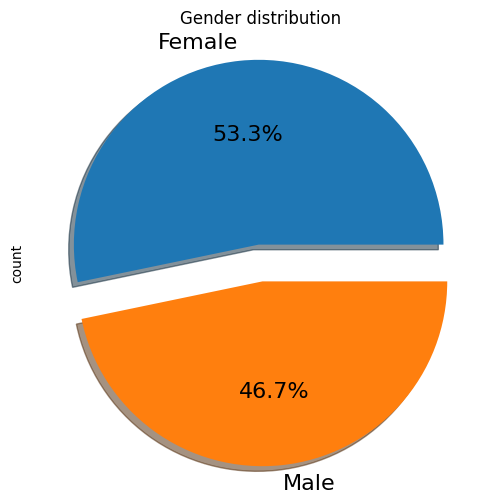

In [46]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
df1['payCardSex'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, 
                                           textprops={'fontsize':16}).set_title("Gender distribution")

In [47]:
top_corridors= df1['corridorName'].value_counts().head(10).index

# Langkah 2: Filter data berdasarkan 10 corridorName terbanyak
filtered_df = df1[df1['corridorName'].isin(top_corridors)]

# Langkah 3: Crosstab distribusi corridorName berdasarkan jenis kelamin
corridor_sex_crosstab = pd.crosstab(filtered_df['corridorName'], filtered_df['payCardSex'])

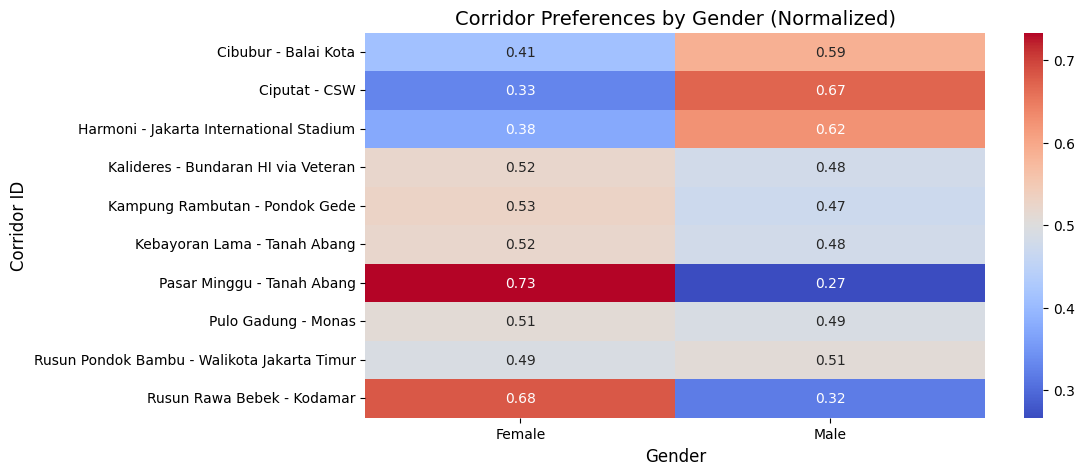

In [48]:
# Normalisasi data (opsional, untuk melihat proporsi)
corridor_sex_crosstab_normalized = corridor_sex_crosstab.div(corridor_sex_crosstab.sum(axis=1), axis=0)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corridor_sex_crosstab_normalized, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Corridor Preferences by Gender (Normalized)', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Corridor ID', fontsize=12)
plt.show()

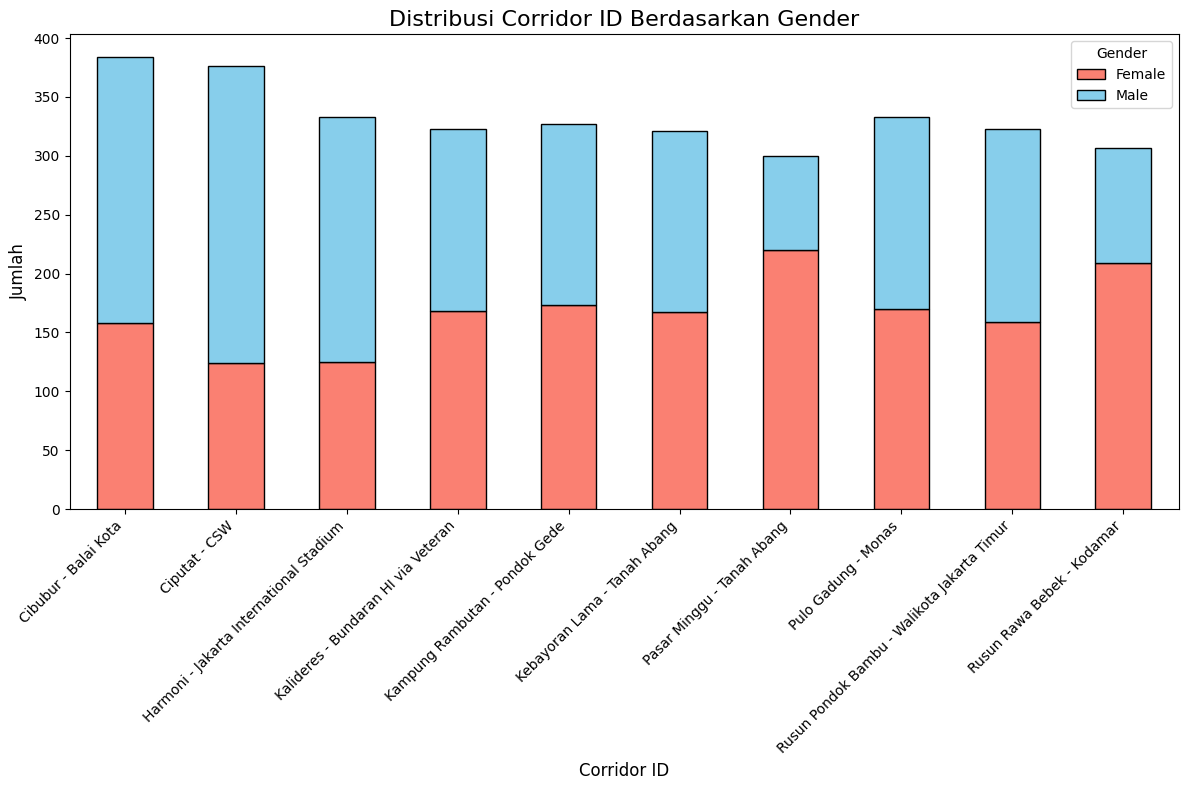

In [49]:
ax = corridor_sex_crosstab.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    color=['salmon','skyblue'],  # Warna untuk kategori gender
    edgecolor='black'
)

# Tambahkan detail ke plot
plt.title('Distribusi Corridor ID Berdasarkan Gender', fontsize=16)
plt.xlabel('Corridor ID', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [50]:
# Hitung usia
# current_year = pd.Timestamp.now().year
df1['age'] = 2023 - df1['payCardBirthDate']

# Kelompokkan usia
bins = [0, 18, 35, 60, np.inf]
labels = ['Youth (<18)', 'Adult (18-35)', 'Middle-aged (35-60)', 'Senior (>60)']
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

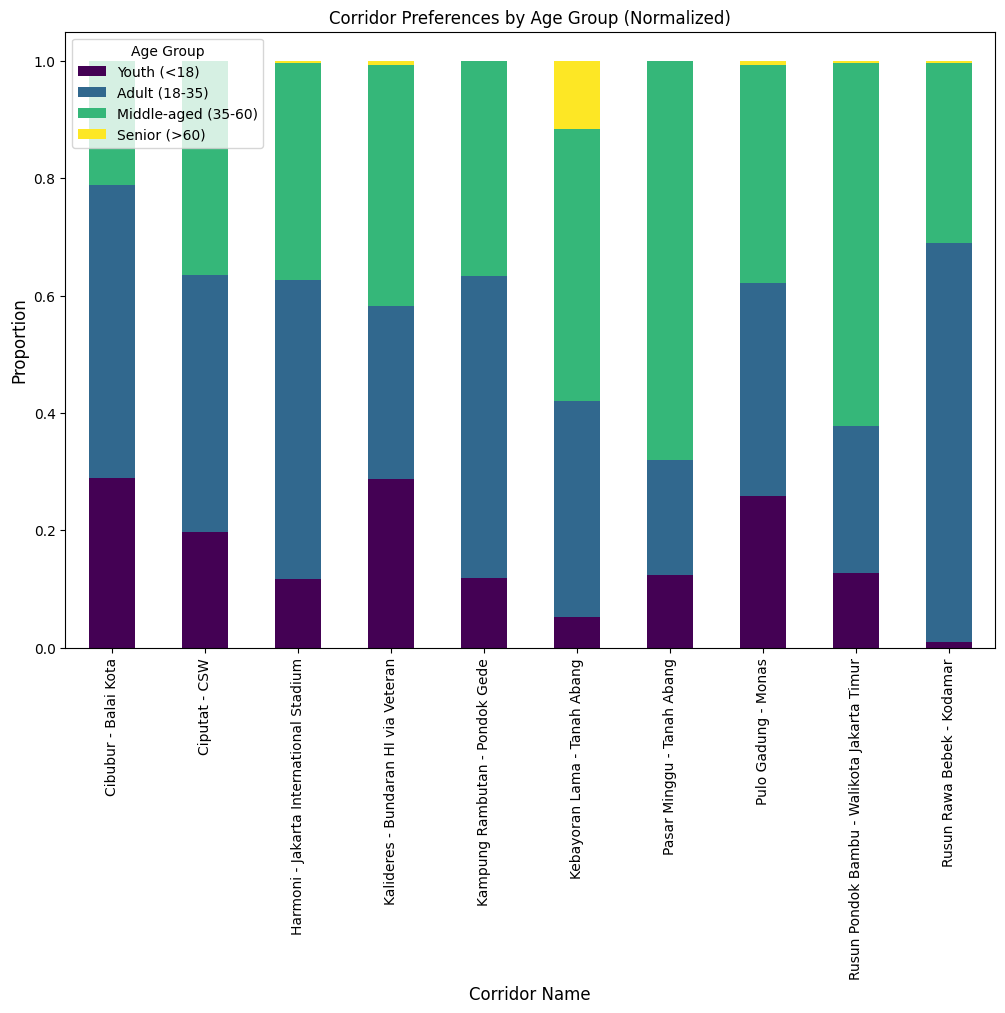

In [51]:
top_corridors = df1['corridorName'].value_counts().head(10).index

# Langkah 2: Filter data berdasarkan 10 corridorName terbanyak
filtered_df = df1[df1['corridorName'].isin(top_corridors)]

# Langkah 3: Crosstab distribusi corridorName berdasarkan jenis kelamin
corridor_age_crosstab = pd.crosstab(filtered_df['corridorName'], filtered_df['age_group'])

# Visualisasi menggunakan bar chart
age_corridor_distribution_normalized = corridor_age_crosstab.div(corridor_age_crosstab.sum(axis=1), axis=0)

age_corridor_distribution_normalized.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='viridis',
    title='Corridor Preferences by Age Group (Normalized)'
)
plt.xlabel('Corridor Name', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Age Group')
plt.show()

Berdasarkan hasil visualisasi grafik, dapat disimpulkan bahwa terdapat perbedaan preferensi koridor berdasarkan jenis kelamin dan usia penumpang. Distribusi gender menunjukkan keseimbangan pada sebagian besar koridor, tetapi koridor seperti Pasar Minggu - Tanah Abang dan Ciputat - CSW didominasi oleh perempuan, sementara koridor seperti Cibubur - Balai Kota lebih banyak digunakan oleh laki-laki. Hal ini mengindikasikan bahwa preferensi penggunaan transportasi dapat dipengaruhi oleh faktor tujuan perjalanan atau kebutuhan spesifik gender tertentu.

Dari segi usia, kelompok dewasa (18-35 tahun) dan middle-aged (35-60 tahun) mendominasi hampir semua koridor, menegaskan bahwa transportasi ini merupakan pilihan utama bagi kelompok usia produktif. Sementara itu, kelompok senior (>60 tahun) memiliki preferensi yang lebih signifikan di koridor seperti Kampung Rambutan - Pondok Gede. Kelompok muda (<18 tahun) lebih terlihat pada koridor tertentu, seperti Rusun Pondok Bambu - Walikota Jakarta Timur.


### **4.4 Hubungan Tap-In dan Tap-Out**

Pertanyaan yang akan dijawab pada analisis ini yaitu:
1. Berapa jarak rata-rata perjalanan?
1. Apakah lokasi tertentu lebih sering digunakan sebagai titik awal atau tujuan?

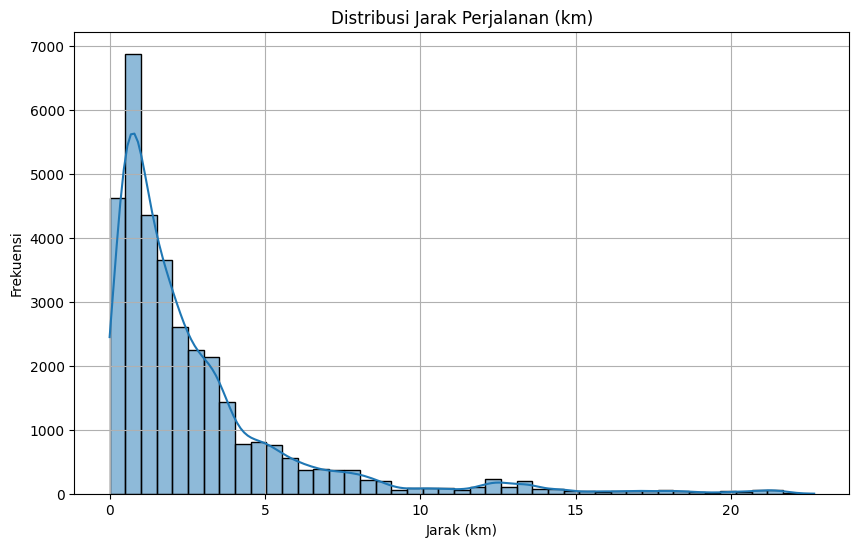

10 Kombinasi Tap-In dan Tap-Out Terpopuler:
                        tapInStopsName    tapOutStopsName  count
2786                 Rusun Kapuk Muara        Penjaringan    125
2265                       Penjaringan  Rusun Kapuk Muara    112
614                  Garuda Taman Mini                BKN     98
404                   Cibubur Junction                BKN     83
615                  Garuda Taman Mini       Pinang Ranti     82
3963          Tanah Merdeka Arah Timur   Kampung Rambutan     81
3578  Simpang Danau Sunter Utara Barat      Jembatan Item     77
2801                 Rusun Penjaringan        Penjaringan     68
2266                       Penjaringan  Rusun Penjaringan     67
2256                      Penggilingan    Rusun Komarudin     66


In [52]:
from geopy.distance import geodesic

# Hitung jarak antara lokasi tap-in dan tap-out (Haversine formula)
def calculate_distance(row):
    tap_in_coords = (row['tapInStopsLat'], row['tapInStopsLon'])
    tap_out_coords = (row['tapOutStopsLat'], row['tapOutStopsLon'])
    return geodesic(tap_in_coords, tap_out_coords).kilometers

df1['distance_km'] = df1.apply(calculate_distance, axis=1)

# Distribusi jarak perjalanan
plt.figure(figsize=(10, 6))
sns.histplot(df1['distance_km'], bins=50,binwidth=0.5, kde=True)
plt.title("Distribusi Jarak Perjalanan (km)")
plt.xlabel("Jarak (km)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

# Frekuensi lokasi tap-in dan tap-out
tap_in_out = (
    df1.groupby(['tapInStopsName', 'tapOutStopsName'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

print("10 Kombinasi Tap-In dan Tap-Out Terpopuler:")
print(tap_in_out.head(10))


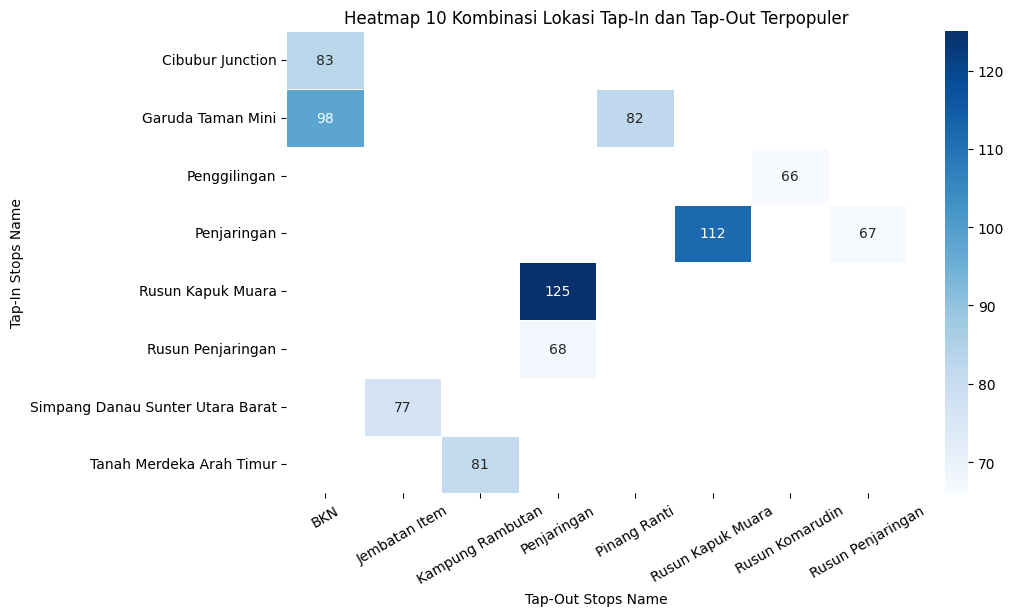

In [53]:
# Ambil hanya kombinasi Tap-In dan Tap-Out dengan frekuensi tertinggi
top_tap_in_out = tap_in_out.sort_values(by='count', ascending=False).head(10)

# Pivot data untuk heatmap
pivot_table = top_tap_in_out.pivot(index='tapInStopsName', columns='tapOutStopsName', values='count')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f', cbar=True, linewidths=.5)
plt.title("Heatmap 10 Kombinasi Lokasi Tap-In dan Tap-Out Terpopuler")
plt.xlabel("Tap-Out Stops Name")
plt.ylabel("Tap-In Stops Name")
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.show()


Berdasarkan hasil visualisasi grafik, dapat disimpulkan bahwa mayoritas perjalanan menggunakan Transjakarta memiliki jarak pendek, yaitu di bawah 5 km, dengan puncak di sekitar 1-2 km. Distribusi ini menunjukkan bahwa Transjakarta terutama digunakan untuk perjalanan lokal atau antar-kawasan yang saling berdekatan. Perjalanan jarak jauh (>10 km) hanya dilakukan oleh sebagian kecil pengguna, mengindikasikan bahwa layanan Transjakarta cenderung lebih efektif untuk kebutuhan mobilitas jarak pendek.

Dari segi lokasi, terdapat beberapa titik yang lebih sering digunakan sebagai titik awal maupun tujuan perjalanan. Lokasi Rusun Kapuk Muara menonjol sebagai salah satu lokasi paling populer, baik sebagai titik tap-in (awal perjalanan) maupun tap-out (tujuan perjalanan). Kombinasi lokasi Rusun Kapuk Muara - Penjaringan menjadi jalur dengan frekuensi perjalanan tertinggi (125 perjalanan), diikuti oleh lokasi seperti Garuda Taman Mini dan Cibubur Junction, yang menunjukkan aktivitas perjalanan tinggi. Hal ini mengindikasikan pentingnya jalur-jalur ini untuk memenuhi kebutuhan mobilitas pengguna, baik untuk keperluan kerja maupun aktivitas lainnya.

## **Section 5. Conclusion and Recommendation**

**5.1 Conclusion**

Berdasarkan analisis data Transjakarta, kita dapat menyimpulkan bahwa:

1. Koridor dan Waktu Perjalanan yang Paling Sering Digunakan
    * Koridor Cibubur-Balai Kota adalah rute paling sibuk dengan total frekuensi perjalanan sebanyak 384 kali, diikuti oleh Ciputat-CSW dengan 376 perjalanan.
    * Jalur Rusun Kapuk Muara - Penjaringan menjadi rute spesifik dengan frekuensi perjalanan tertinggi (125 perjalanan).
    * Puncak aktivitas perjalanan terjadi pada pukul 06:00 (pagi) dan 17:00 (sore), mencerminkan pola perjalanan komuter.
    * Hari Kerja vs Akhir Pekan: Jumlah penumpang jauh lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan peran Transjakarta sebagai moda transportasi utama pekerja.

2. Distribusi Berdasarkan Arah Perjalanan (Go/Back)
    * Tidak terdapat perbedaan signifikan dalam jumlah perjalanan antara arah Go (pergi) dan Back (pulang) di semua koridor. Distribusi perjalanan relatif seimbang, menandakan kebutuhan layanan seragam di kedua arah.
3. Distribusi Berdasarkan Demografi
    * _Jenis Kelamin_: Koridor seperti Pasar Minggu - Tanah Abang dan Ciputat-CSW lebih banyak digunakan oleh perempuan.
    Cibubur-Balai Kota cenderung didominasi oleh laki-laki.
    * _Usia_:
    Kelompok dewasa (18-35 tahun) dan middle-aged (35-60 tahun) mendominasi hampir semua koridor, menegaskan bahwa Transjakarta adalah pilihan utama kelompok usia produktif.
    Kelompok senior (>60 tahun) memiliki preferensi untuk koridor tertentu seperti Kampung Rambutan - Pondok Gede.
    Kelompok muda (<18 tahun) lebih sering ditemukan pada koridor Rusun Pondok Bambu - Walikota Jakarta Timur.
4. Pola Perjalanan
    * _Jarak Perjalanan_:
    Sebagian besar perjalanan adalah jarak pendek (di bawah 5 km), dengan puncak pada perjalanan 1-2 km, menunjukkan Transjakarta lebih sering digunakan untuk perjalanan lokal.
    * _Lokasi Tap-in dan Tap-out_:
    Titik populer seperti Rusun Kapuk Muara menjadi titik awal dan tujuan perjalanan yang signifikan, bersama dengan lokasi seperti Garuda Taman Mini dan Cibubur Junction.

**5.2 Recommendation**

Rekomendasi yang Dapat Ditindaklanjuti
1. Alokasi Armada:
    * Tingkatkan jumlah armada pada koridor Cibubur-Balai Kota dan Ciputat-CSW pada waktu puncak (pukul 06:00 dan 17:00).
    * Sediakan armada tambahan pada hari kerja untuk koridor dengan dominasi penumpang komuter.

1. Pengembangan Infrastruktur:
    * Pertimbangkan pengembangan infrastruktur di titik populer seperti Rusun Kapuk Muara, Garuda Taman Mini, dan Cibubur Junction untuk mendukung volume perjalanan yang tinggi.

1. Layanan Berdasarkan Demografi:
    * Perhatikan kebutuhan penumpang perempuan di koridor Pasar Minggu - Tanah Abang dan Ciputat-CSW, misalnya, dengan menyediakan layanan aman dan nyaman.
    * Untuk kelompok usia senior, tingkatkan aksesibilitas di koridor seperti Kampung Rambutan - Pondok Gede.

1. Strategi untuk Akhir Pekan:
    * Pertimbangkan promosi khusus atau layanan rekreasional pada akhir pekan untuk meningkatkan jumlah pengguna.

1. Peningkatan Rute Jarak Pendek:
    * Fokus pada optimasi layanan untuk perjalanan jarak pendek (<5 km), karena mayoritas pengguna menggunakan Transjakarta untuk kebutuhan lokal.